# Análise do Projeto <font color=blue>TITANIC</font>
***
Depois de fazer o download dos arquivos necessários para iniciar o processo de análise, importei os dados necessários para começar a jornada de trabalho. Não me preocupei muito nesse caso em analisar se o arquivo estava corrompido, pois sabia que seria para uso acadêmico e com certeza não teria a necessidade de verificar a procedência do mesmo. Importei os pacotes que tinha certeza que haveria necessidade ``Pandas`` e `Matplotlib` e outros `Seaborn` e `Numpy` caso precisasse. 

### Lendo o arquivo  

Após fazer o download da pasta e descomprimir o arquivo zipado <font color=blue>(titanic-data-6.csv)</font>, criei uma pasta e defini o local onde seriam salvos os arquivos. Depois de ler o arquivo usei `head()` para verificar se o arquivo estava em ordem.       

In [48]:
# Importar pacotes necessarios para análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Entendendo com detalhes todas as variáveis das colunas
***  
As variáveis podem determinar diferentes resultados de acordo com a classificação a que se atribui.

__PassengerId__ - Numera os passageiros por ordem numérica

__Survived__ - Estão divididas em 2 classificações:
         1. Sobreviveu: definida pelo numero 1 (um)
         2. Não Sobreviveu: Definida pelo numero 2 (dois)

__Pclass__ - Temos 3 classes definidas desta forma:
        1. Primeira Classe (Luxo)
        2. Segunda Classe (Mediano)
        3. Terceira Classe (Standard)
        
__Name__ - Nome da pessoa que pode ajudar na definição do genero futuramente

__Sex__ - Temos 2 gêneros definidos:
        1. Female: Mulher
        2. Male: Homem
        
__Age__ - Idade da pessoa em questão

__SibSp__ - Pode ser considerado desta forma:
        1. Irmão(s) e Irmã(s)
        2. Marido e Esposa
        
__Parch__ - Pode ser considerado desta forma:
        1. Mãe ou Pai
        2. Filho(s) ou Filha(s)
        
__Ticket__ - Indica o numero+letras do ticket de embarque

__Fare__ - Indica o valor da passagem

__Cabin__ - Mostra a cabine que a pessoa está hospedada

__Embarked__ - Mostra onde a pessoa embarcou, podendo ser:
        1. Cherbourg representada com a letra "C"
        2. Queenstown representada com a letra "Q"
        3. Southampton representada com a letra "S"
        
# Trabalhando as perguntas da análise
***
Para se começar este estudo precisamos fazer as perguntas relevantes ao caso; para termos um "norte" à seguir e usar as ferramentas certas para podermos chegar ao resultado satisfatório e mais próximo do correto. Sendo assim presumi algumas perguntas e me foquei inicialmente em uma pergunta central ao nosso estudo:
* <font color=blue>"Quais são os fatores que podem ser considerados como essenciais para a sobrevivência neste cenário?".</font>

E, baseando-se nesta questão, trabalhei outras perguntas que viriam a ter um peso relativamente alto; no tocante ao nosso assunto central sobre "sobrevivência":
* " Ser/estar na 1 classe fez diferença?"
* "Ser do sexo feminino fez diferença?"
* "A idade ou faixa etária fez diferença?"
* "Viajar sozinho ou acompanhado fez diferença?"
* "O valor do passagem fez diferença?"

Sabemos que temos alguns outros pontos que podem estar relacionados entre si, como por exemplo: 
* Se a passagem for extremamente cara tem muita chance de não ser da 3 classe;
* Por educação e por questão cultural, mulheres e crianças são salvas em primeiro lugar;
* A pessoa que tem mais filhos ou pais terá que se preocupar mais na hora de se salvar do que aquela que não tem filhos/pais;
* Crianças e Idosos teriam menos chance de sobreviver sozinhas se não estivessem acompanhadas no meio da multidão.

Além destes citados acima, sabemos que temos muitos outros fatores que podem se co-relacionar; mas creio que se começarmos a trabalhar essas questões levantadas, no quesito da sobrevivência, com certeza chegaremos a um denominador comum para aqueles que conseguiram sobreviver e então poderemos concluir com uma maior precisão sobre os fatos. A seguir, vamos analisar o dataset:

### Preparando a análise
Comecei analisando as informações do dataset usando `info()` e fui usando `head()` sempre que precisasse para confirmar as alterações feitas em partes. Percebi alguns aspectos que deveriam ser modificados:

In [49]:
# Analisar as informações do dataset
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* Nas colunas `Age`, `Cabin` e `Embarked` faltavam alguns dados; 
* Teria que usar `duplicated()` para saber se haviam valores duplicados;

In [50]:
# Procurar por dados duplicados do dataset
df_titanic.duplicated().sum()

0

* Algumas colunas teriam que ser dropadas pois não tinham validade para a minha análise;

In [51]:
# Dropar as colunas que não são necessarias para analise
df_titanic.drop(['Name','PassengerId','Ticket','Cabin','Embarked'], axis=1, inplace=True)

In [52]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


* Teria que aplicar `isnull()` para saber se haviam valores nulos.

In [53]:
# Procurar por dados nulos 
df_titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

* Já que a coluna `Age` estava com valores nulos, tive que achar a média e substituir para completar a coluna com dados relevantes.

In [54]:
# Achar a média da coluna Age e substituir pelos dados nulos
mean = df_titanic['Age'].mean()
df_titanic['Age'].fillna(mean, inplace=True)
df_titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

* Teria que usa `astype()` na coluna `Age` para trocar os valores de `Flot` para `int`, para que assim os valores ficassem inteiros;

In [55]:
# Trocar o formato da coluna Age para Int afim de padronizar os numeros
df_titanic['Age'] = df_titanic['Age'].astype(int)

In [56]:
df_titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500


* Utilizando uma função, vamos analisar quantos homens e quantas mulheres haviam no local

In [57]:
# Vamos substituir a coluna em questão para "lista", apenas para facilitar a escrita do código 
lista = df_titanic['Sex']

def count_lista(lista):
    """"
        Definida uma função com objetivo de criar uma lista com a soma total dos gêneros.
        INPUT: 
            param1: Usado "if" para achar o número total do item "Male"
            param2: Usado "elif" para achar o número total do item "Female"
        OUTPUT: 
            Imprimir duas listas com a contagem total de "Male" e "Female" da coluna "Sex"
    """
    male = 0
    female = 0
    
#Fazendo loop para definir as listas Male e Female  
    for item in lista:
        if item == 'male':
            male = male + 1
        
        elif item == 'female':
            female = female + 1 
    return [male,female]

print("Imprimindo quantos Male e Female foram encontrados: ")
print(count_lista(lista))


Imprimindo quantos Male e Female foram encontrados: 
[577, 314]


# Separando a lista em "Survived" e "Not Survived"
***
Ao separar a lista principal em sobreviventes e não sobreviventes podemos trabalhar os predominantes aspectos quanto a idade, sexo, ticket e nivel da classe em que estavam classificados. Desta forma podemos mensurar quais aspectos seriam de importante valor para a sobrevivência deste cenário e até de conhecer aqueles que trariam maior chance de não sobrevivência (por esta razão decidi dar atenção à lista de não sobreviventes). Assim, resolvi tratar a lista desta forma:
* Definir usando a coluna `Survived` aqueles que iriam para a lista `survived` e `not_survived`;
* Usar `describe()` para ter a contagem total da lista e os valores da sua media (em ambos os casos);
* Trocar o rótulo da coluna da lista `not_survived` de `Survived` para `NotSurvived` usando `rename()` para não termos maiores confusões de nomenclatura no futuro. 

In [58]:
# Vamos separar as listas em "survived" e "not_survived"
survived = []
survived = df_titanic.loc[df_titanic['Survived'] == 1] 

In [59]:
survived.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.426901,0.473684,0.464912,48.395408
std,0.0,0.863321,13.796348,0.708688,0.771712,66.596998
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,21.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,29.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,35.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [60]:
not_survived = []
not_survived = df_titanic.loc[df_titanic['Survived'] == 0] 

In [62]:
not_survived.rename(columns={'Survived':'NotSurvived'}, inplace=True)

In [63]:
not_survived.describe()

,NotSurvived,Pclass,Age,SibSp,Parch,Fare
count,549.0,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.240437,0.553734,0.329690,22.117887
std,0.0,0.735805,12.463835,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,29.000000,0.000000,0.000000,10.500000
75%,0.0,3.000000,35.000000,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


Analisando os gráficos acima podemos perceber que em média:
    * Àqueles que gastaram mais na compra do ticket estão no grupo de sobreviventes;
    * A idade dos sobreviventes fica em 28 anos e dos que não sobreviveram em 30 anos.
    
# Análise dos aspectos predominantes nas listas Survived e Not Survived
***
Primeiro vamos analisar a coluna `Sex`: 
* Foram usados `value_counts` , `plot()` e `groupby()` para demonstrar os gêneros que mais predominaram em ambas as listas para facilitar nossa conclusão no final do estudo.

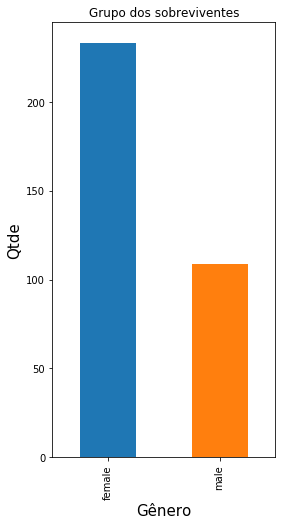

In [64]:
# Vamos analisar qual genero predominou no grupo que sobreviveu e que não sobreviveu
ind = survived['Sex'].value_counts().index
survived['Sex'].value_counts()[ind].plot(title='Grupo dos sobreviventes', kind='bar', figsize=(4, 8))
plt.xlabel('Gênero', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

In [65]:
survived.groupby('Sex').count()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,233,233,233,233,233,233
male,109,109,109,109,109,109


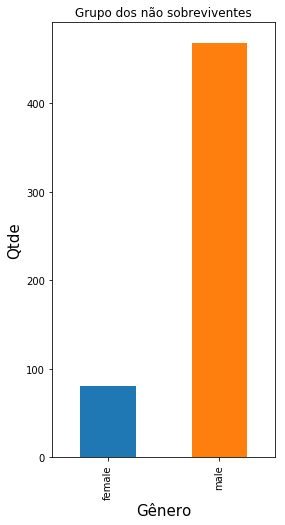

In [66]:
not_survived['Sex'].value_counts()[ind].plot(title='Grupo dos não sobreviventes', kind='bar', figsize=(4, 8))
plt.xlabel('Gênero', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

In [67]:
not_survived.groupby('Sex').count()

,NotSurvived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,81,81,81,81,81,81
male,468,468,468,468,468,468


Após análise dos gráficos podemos entender que:
    * O sexo feminino foi o de maior predominância no grupo de sobreviventes;
    * O gênero masculino foi maior no grupo dos não sobreviventes.
Em seguida, iremos analisar a coluna `Pclass` usando os mesmos `value_counts` , `plot()` e `groupby()`.

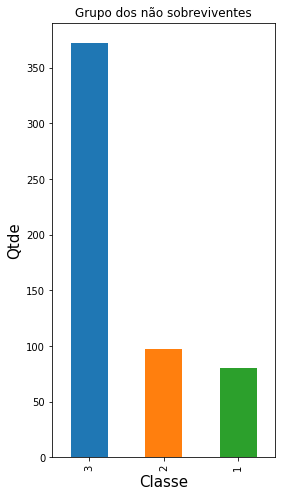

In [68]:
# Vamos analisar qual Classe predominou no grupo que sobreviveu e que não sobreviveu
ind = not_survived['Pclass'].value_counts().index
not_survived['Pclass'].value_counts().plot(title='Grupo dos não sobreviventes', kind='bar', figsize=(4, 8))
plt.xlabel('Classe', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

In [69]:
not_survived.groupby('Pclass').count()

,NotSurvived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,80,80,80,80,80,80
2,97,97,97,97,97,97
3,372,372,372,372,372,372


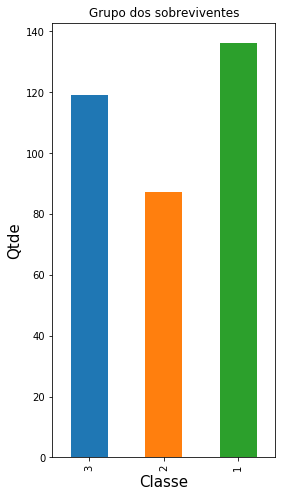

In [70]:
survived['Pclass'].value_counts()[ind].plot(title='Grupo dos sobreviventes', kind='bar', figsize=(4, 8))
plt.xlabel('Classe', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

In [71]:
survived.groupby('Pclass').count()

,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,136,136,136,136,136,136
2,87,87,87,87,87,87
3,119,119,119,119,119,119


Após análise dos gráficos podemos entender que:
    * A 1 Classe foi o de maior predominância no grupo de sobreviventes
    * A 3 Classe foi maior no grupo dos não sobreviventes.
Em seguida, iremos analisar a coluna `Fare` usando os mesmos `value_counts` , `plot()` e `groupby()`.

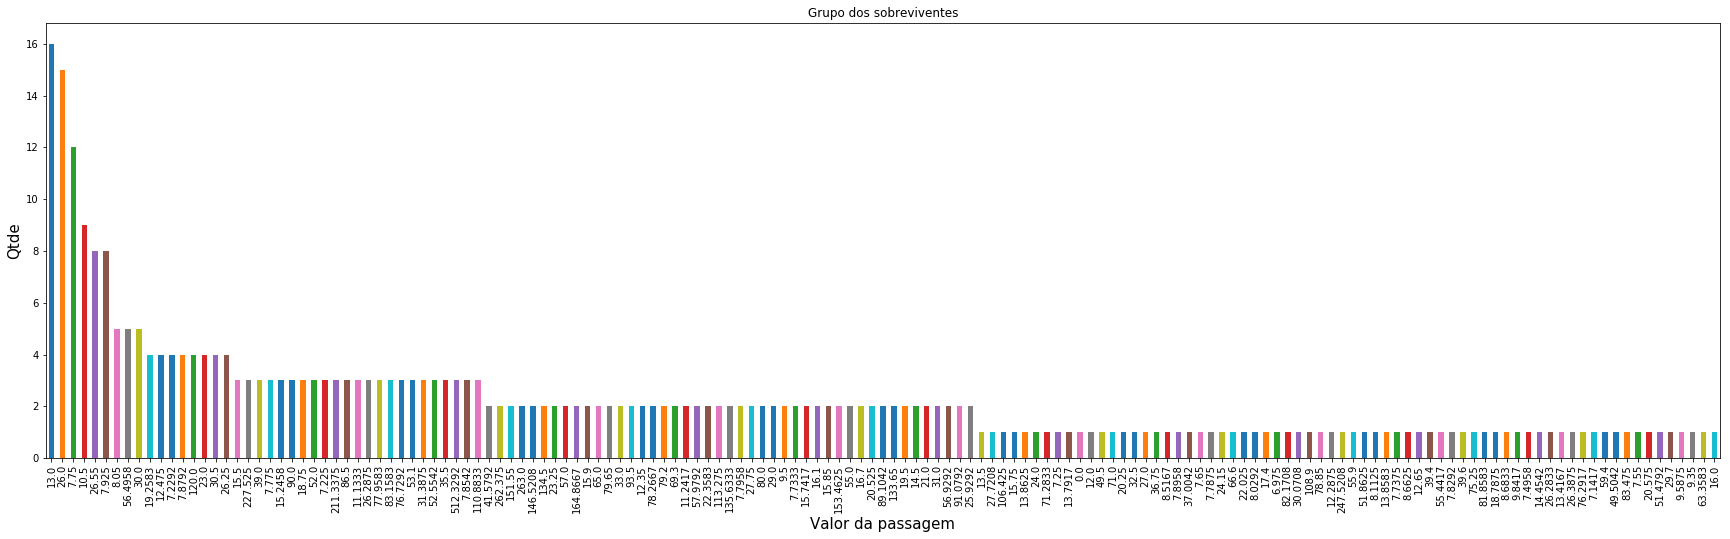

In [72]:
# Vamos analisar qual faixa valores predominou no grupo dos sobreviventes e dos não sobreviventes
ind = survived['Fare'].value_counts().index
survived['Fare'].value_counts()[ind].plot(title='Grupo dos sobreviventes', kind='bar', figsize=(30, 8))
plt.xlabel('Valor da passagem', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

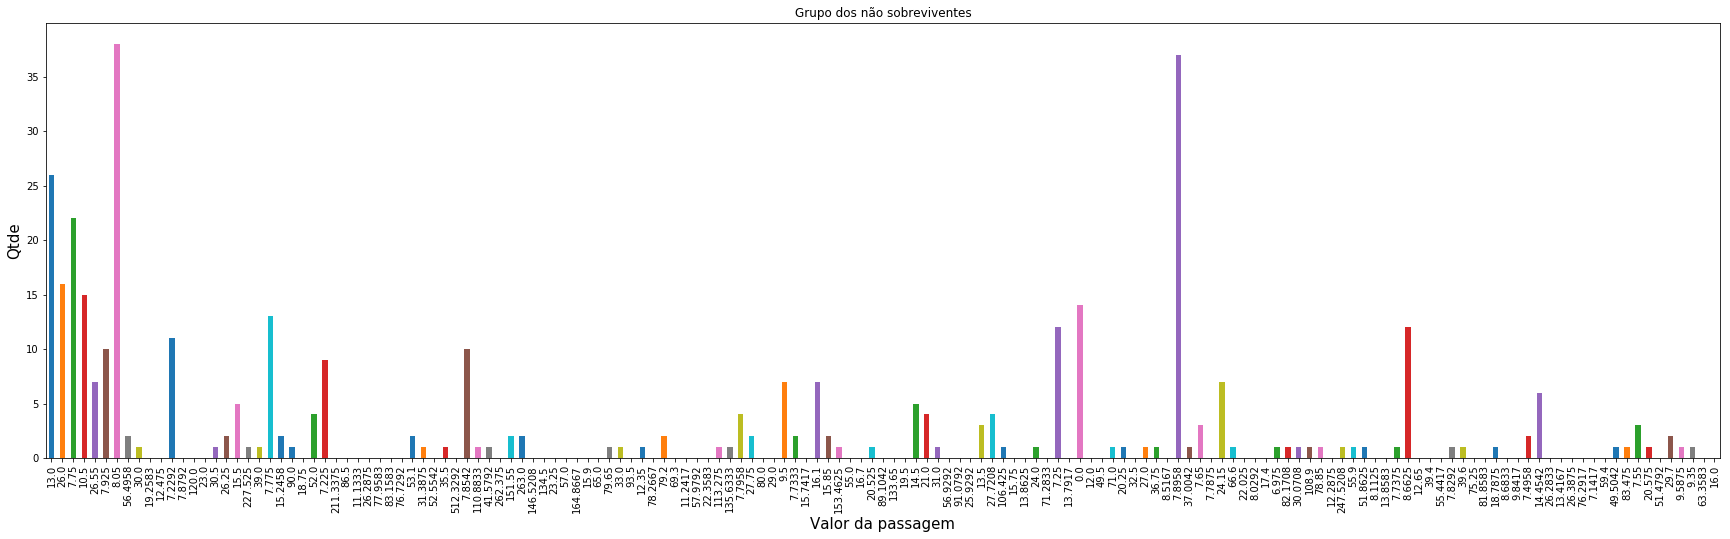

In [73]:
not_survived['Fare'].value_counts()[ind].plot(title='Grupo dos não sobreviventes', kind='bar', figsize=(30, 8))
plt.xlabel('Valor da passagem', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

Após análise dos gráficos podemos entender que:
    * A faixa de valores entre $7.75 a $26 foi a de maior predominância no grupo de sobreviventes;
    * A faixa de valores entre $7.89 a $8.05 foi a de maior predominância no grupo dos não sobreviventes.
Em seguida, iremos analisar a coluna `Age` usando os mesmos `value_counts` , `plot()` e `groupby()`.

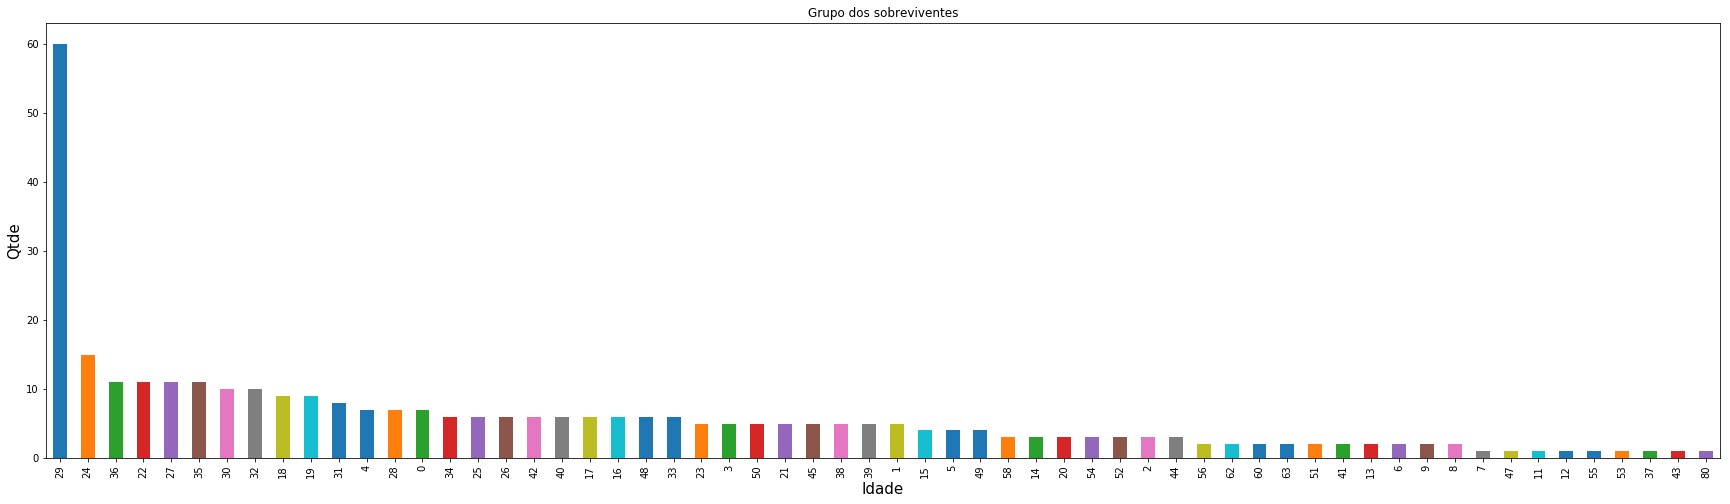

In [74]:
# Vamos analisar qual faixa de idade predominou no grupo dos sobreviventes e dos não sobreviventes
ind = survived['Age'].value_counts().index
survived['Age'].value_counts()[ind].plot(title='Grupo dos sobreviventes', kind='bar', figsize=(30, 8))
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

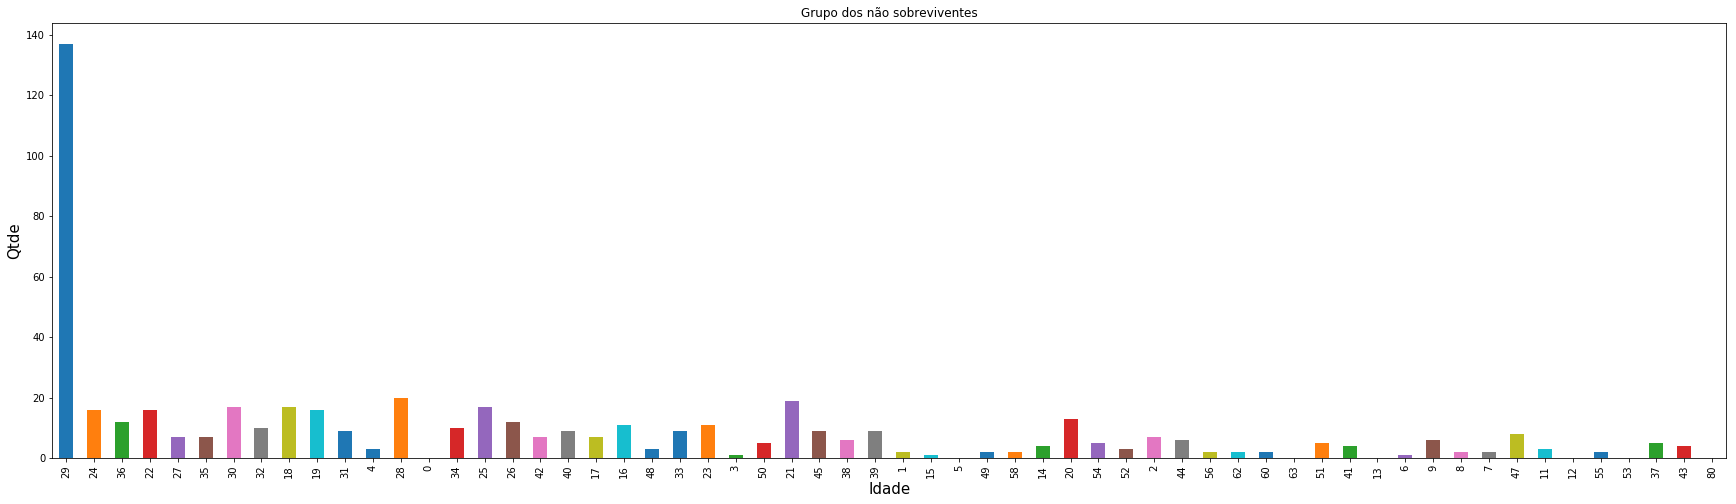

In [76]:
not_survived['Age'].value_counts()[ind].plot(title='Grupo dos não sobreviventes', kind='bar', figsize=(30, 8))
plt.xlabel('Idade', fontsize=15)
plt.ylabel('Qtde', fontsize=15);

Após análise dos gráficos podemos entender que:
    * A faixa de idade entre 24 a 29 anos foi a de maior predominância no grupo de sobreviventes;
    * A faixa de idade entre 21 a 29 anos foi a de maior predominância no grupo dos não sobreviventes.
Em seguida, iremos analisar a coluna `SibSp` usando os mesmos `value_counts` , `plot()` e `groupby()`.

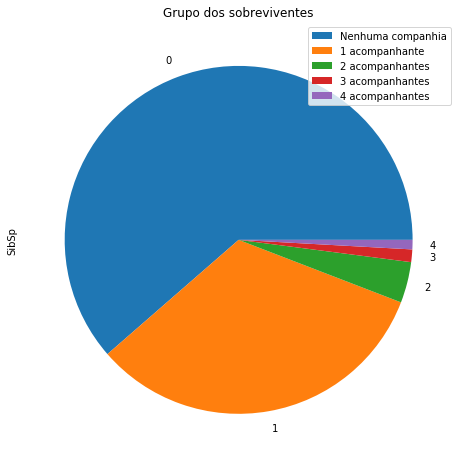

In [77]:
# Vamos analisar aqueles que estavam com irmãos/cônjuge no grupo dos sobreviventes e dos não sobreviventes
ind = survived['SibSp'].value_counts().index
survived['SibSp'].value_counts()[ind].plot(title='Grupo dos sobreviventes', kind='pie', figsize=(10, 8))
labels = ['Nenhuma companhia','1 acompanhante','2 acompanhantes','3 acompanhantes','4 acompanhantes']
plt.legend(labels);

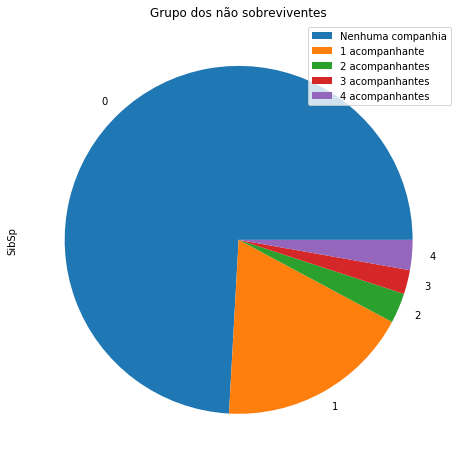

In [78]:
not_survived['SibSp'].value_counts()[ind].plot(title='Grupo dos não sobreviventes', kind='pie', figsize=(10, 8))
labels = ['Nenhuma companhia','1 acompanhante','2 acompanhantes','3 acompanhantes','4 acompanhantes']
plt.legend(labels);

Após análise dos gráficos podemos entender que:
    * Aqueles que estavam sem irmãos/cônjuge foram os de maior predominância no grupo de sobreviventes;
    * Aqueles que estavam sem irmãos/cônjuge também foram os de maior predominância no grupo de não sobreviventes;
Em seguida, iremos analisar a coluna `Parch` usando os mesmos `value_counts` , `plot()` e `groupby()`.

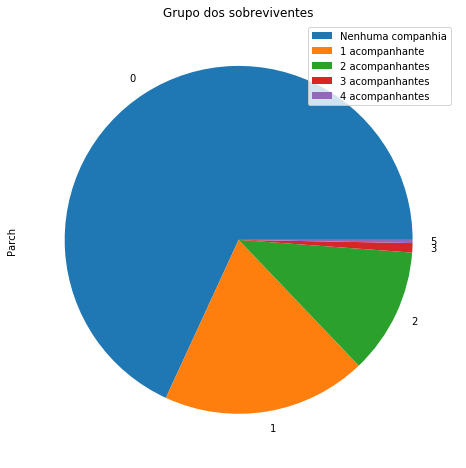

In [79]:
# Vamos analisar aqueles que estavam com pais/filhos no grupo dos sobreviventes e dos não sobreviventes
ind = survived['Parch'].value_counts().index
survived['Parch'].value_counts()[ind].plot(title='Grupo dos sobreviventes', kind='pie', figsize=(10, 8))
labels = ['Nenhuma companhia','1 acompanhante','2 acompanhantes','3 acompanhantes','4 acompanhantes']
plt.legend(labels);

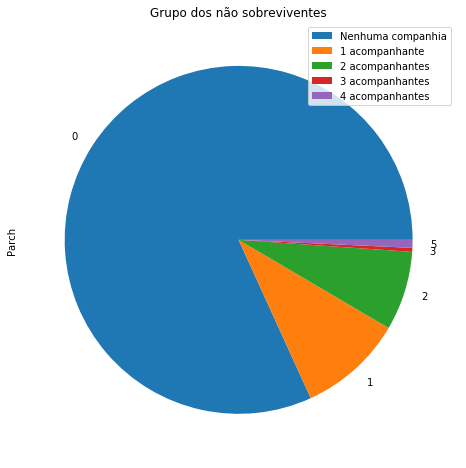

In [80]:
not_survived['Parch'].value_counts()[ind].plot(title='Grupo dos não sobreviventes', kind='pie', figsize=(10, 8))
labels = ['Nenhuma companhia','1 acompanhante','2 acompanhantes','3 acompanhantes','4 acompanhantes']
plt.legend(labels);

Após análise dos gráficos podemos entender que:
    * Aqueles que estavam sem pais/filhos foram os de maior predominância no grupo de sobreviventes;
    * Aqueles que estavam sem pais/filhos também foram os de maior predominância no grupo de não sobreviventes;
Agora que fizemos todas as análises individuais vou fazer apenas mais uma co-relação entre qual o gênero que teve um maior gasto com passagem e começarei usando `plot` e `groupby`. Ficou assim:  

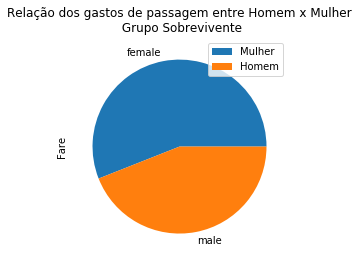

In [81]:
# Análise sobre qual gênero gastou mais nas listas sobreviventes e não sobreviventes
survived.groupby('Sex')['Fare'].mean().plot(kind='pie', title='Relação dos gastos de passagem entre Homem x Mulher\n Grupo Sobrevivente');
labels = ['Mulher','Homem']
plt.legend(labels);

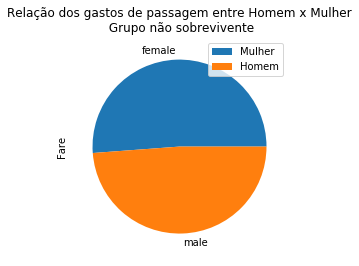

In [82]:
not_survived.groupby('Sex')['Fare'].mean().plot(kind='pie', title='Relação dos gastos de passagem entre Homem x Mulher\n Grupo não sobrevivente')
labels = ['Mulher','Homem']
plt.legend(labels);

Após análise dos gráficos podemos entender que em ambas as listas o gênero feminino foi a que teve predominância em valores gastos na compra do ticket para embarcar no titanic. 

## Organizando dados para a Conclusão
***
Após análise dos dados (e com a ajuda dos gráficos) podemos colher alguns resultados importantes dentro do grupo dos sobreviventes para podermos responder àquelas questões iniciais levantadas no inicio do estudo, tais como:
### <font color=blue> " Ser/estar na 1 classe fez diferença?" </font>
Pelo que consta no gráfico, sim! A classe que mais sobreviveu dentro do grupo foi a 1 classe. Em contra-partida no grupo das pessoas que não sobreviveram a 3 classe saiu em disparada, já que 1 e 2 classe somando davam 177 pessoas perto das mais de 372 pessoas da 3 classe que não sobreviveram dentro deste grupo. 

### <font color=blue>"Ser do sexo feminino fez diferença?"</font>
Sim! O número de mulheres que sobreviveram foi duas vezes maior do que o número de homens que sobreviveram no estudo. Além disso tudo, não podemos deixar de notar que no grupo dos não sobreviventes o número de homens de morreram foi quase seis vezes maior em relação ao número de mulheres. Isso nos faz perceber que o fato de vc ser do sexo feminino te dava uma chance absurdamente maior de sobreviver do que ser do sexo masculino.  

### <font color=blue>"A idade ou faixa etária fez diferença?"</font>
Em nossa análise a faixa daqueles que tiveram um resultado mais expressante ficou entre 24 a 29 anos e a média daqueles que sobreviveram ficou em 28 anos. Isso mostra que nessa faixa/média de idade a pessoa teria mais chances de sobreviver em relação aos outros grupos de idade.    

### <font color=blue>"Viajar sozinho ou acompanhado fez diferença?"</font>
Novamente Sim! Aqueles que viajavam sem irmãos(ãs), pais, filhos ou cônjuge tiveram chances muito maiores de sobrevivência em relação a grupos acompanhados. 

### <font color=blue>"O valor do passagem fez diferença?"</font>
Sim! Dentre os sobreviventes temos uma média de passagem de 48 dólares e uma faixa de 7.75 à 26 dólares sendo este o grupo predominante. No outro grupo uma média de apenas 22 dólares e a faixa de 7.89 à 8.05 dólares no grupo dos que predominam a lista dos que não sobreviveram.

# Conclusão
***
Respondendo então as perguntas feitas, podemos concluir assim que o grupo predominante neste estudo foi o Feminino, média de idade de 28 anos, viajando na 1 ou 2 classe e sem estar acompanhada. 

## Limitações
***
Verificou-se neste estudo que valores e alguns dados estavam faltando nas colunas. Na coluna `Age` os valores faltantes foram preenchidos com a média dos valores da coluna. Na coluna `Embarked` poderia se pegar cidade com maior número de embarque e preencher os valore faltantes e a coluna `Cabin` podería ser descartada pois apresentava uma quantidade muito grande de valores nulos e não traria benefícios para o resultado final da análise.

### Referências

__https://www.kaggle.com/startupsci/titanic-data-science-solutions__<br>
__https://www.kaggle.com/mjbahmani/a-comprehensive-ml-workflow-with-python__<br>
__https://www.kaggle.com/little7/titanic-data-science-solutions__<br>
__https://www.kaggle.com/c/titanic/data__<br>
__https://www.kaggle.com/c/titanic__<br>
        